In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('BBC News Train.csv')

In [3]:
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
df_train['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [5]:
# printing the shape of data
df_train.shape

(1490, 3)

# *Data Cleaning*


In [6]:
# printing the info of the data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [7]:
# Droping the artical id column which is of no use

df_train.drop(['ArticleId'], axis = 1, inplace = True)

In [8]:
# converting the target column data from text to number using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df_train['Category'] = encoder.fit_transform(df_train['Category'])

In [10]:
# lowering the text of columns names

df_train.rename(columns = {'Text' : 'text', 'Category' : 'category'}, inplace = True)

In [11]:
df_train.head()

,text,category
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,0
3,lifestyle governs mobile choice faster bett...,4
4,enron bosses in $168m payout eighteen former e...,0


In [12]:
df_train['category'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       4
4       0
       ..
1485    1
1486    1
1487    0
1488    4
1489    4
Name: category, Length: 1490, dtype: int32>

In [13]:
# Checking the null values
df_train.isnull().sum()

text        0
category    0
dtype: int64

In [14]:
# Checking dublicate data
df_train.duplicated().sum()

50

In [15]:
#removing the duplicate data
df_train.drop_duplicates(keep = 'first')

,text,category
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens in ...,0
3,lifestyle governs mobile choice faster bett...,4
4,enron bosses in $168m payout eighteen former e...,0
...,...,...
1485,double eviction from big brother model caprice...,1
1486,dj double act revamp chart show dj duo jk and ...,1
1487,weak dollar hits reuters revenues at media gro...,0
1488,apple ipod family expands market apple has exp...,4


EDA

In [16]:
# counting the 'business', 'sport', 'tech', 'entertainment', 'politics' data present in the database
df_train['category'].value_counts()

3    346
0    336
2    274
1    273
4    261
Name: category, dtype: int64

In [17]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x23e0c802190>,
 [Text(0.8200407790292978, 0.7331665027325119, 'business'),
  Text(-0.6180998684604179, 0.9099189813435118, 'sport'),
  Text(-1.0468765423870772, -0.337712162943058, 'tech'),
  Text(-0.11575012941458519, -1.0938930055268234, 'entertainment'),
  Text(0.9376010952816485, -0.57524271931651, 'politics')],
 [Text(0.44729497037961696, 0.399909001490461, '23.22'),
  Text(-0.33714538279659156, 0.4963194443691882, '22.55'),
  Text(-0.5710235685747692, -0.18420663433257706, '18.39'),
  Text(-0.06313643422613736, -0.59666891210554, '18.32'),
  Text(0.5114187792445355, -0.3137687559908236, '17.52')])

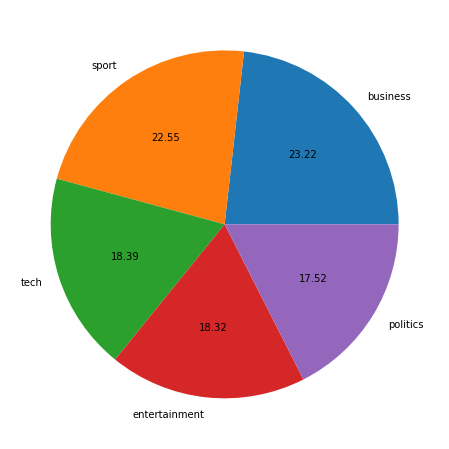

In [18]:
# Plotting the graph
from matplotlib import figure
plt.figure(figsize=(18, 8))
plt.pie(df_train['category'].value_counts(), labels = ['business', 'sport', 'tech', 'entertainment', 'politics'], autopct = '%0.2f')

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhavya
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#checking the character length of the text data
df_train['num_characters'] = df_train['text'].apply(len)

In [22]:
df_train.head()

,text,category,num_characters
0,worldcom ex-boss launches defence lawyers defe...,0,1866
1,german business confidence slides german busin...,0,2016
2,bbc poll indicates economic gloom citizens in ...,0,3104
3,lifestyle governs mobile choice faster bett...,4,3618
4,enron bosses in $168m payout eighteen former e...,0,2190


In [23]:
#checking the number of words of text data
df_train['num_words'] = df_train['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df_train.head()

,text,category,num_characters,num_words
0,worldcom ex-boss launches defence lawyers defe...,0,1866,316
1,german business confidence slides german busin...,0,2016,342
2,bbc poll indicates economic gloom citizens in ...,0,3104,544
3,lifestyle governs mobile choice faster bett...,4,3618,670
4,enron bosses in $168m payout eighteen former e...,0,2190,382


In [25]:
#checking the number of sentences of text data
df_train['num_sentences'] = df_train['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df_train.head()

,text,category,num_characters,num_words,num_sentences
0,worldcom ex-boss launches defence lawyers defe...,0,1866,316,12
1,german business confidence slides german busin...,0,2016,342,14
2,bbc poll indicates economic gloom citizens in ...,0,3104,544,21
3,lifestyle governs mobile choice faster bett...,4,3618,670,31
4,enron bosses in $168m payout eighteen former e...,0,2190,382,16


In [27]:
# printing the description of the data
df_train[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1490.000000,1490.000000,1490.000000
mean,2233.461745,406.687248,17.573826
std,1205.153358,221.932994,9.989799
min,501.000000,95.000000,4.000000
25%,1453.000000,266.000000,11.000000
50%,1961.000000,356.500000,15.000000
75%,2751.250000,494.000000,21.000000
max,18387.000000,3496.000000,138.000000


In [28]:
# describing the data on basis of business
df_train[df_train['category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,336.000000,336.000000,336.000000
mean,1983.104167,355.776786,14.800595
std,790.180447,140.751610,6.053404
min,846.000000,154.000000,5.000000
25%,1486.250000,268.000000,11.000000
50%,1830.500000,324.500000,14.000000
75%,2331.000000,411.750000,17.000000
max,5406.000000,966.000000,47.000000


In [29]:
# describing the data on basis of entertainment
df_train[df_train['category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,273.000000,273.000000,273.000000
mean,1910.380952,352.245421,15.186813
std,1142.478958,215.631430,10.132481
min,866.000000,153.000000,5.000000
25%,1312.000000,242.000000,10.000000
50%,1571.000000,287.000000,13.000000
75%,2147.000000,398.000000,17.000000
max,13619.000000,2596.000000,119.000000


In [30]:
# describing the data on basis of politics
df_train[df_train['category'] == 2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,274.000000,274.000000,274.000000
mean,2617.905109,470.941606,19.562044
std,1448.447009,270.892698,11.551358
min,501.000000,95.000000,4.000000
25%,1867.000000,333.250000,14.000000
50%,2599.500000,462.500000,19.000000
75%,3099.000000,553.250000,23.000000
max,18387.000000,3496.000000,138.000000


In [31]:
# describing the data on basis of sport
df_train[df_train['category'] == 3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,346.000000,346.000000,346.000000
mean,1894.624277,356.008671,16.343931
std,1051.814635,196.684364,8.783395
min,719.000000,128.000000,5.000000
25%,1199.000000,224.500000,10.000000
50%,1641.000000,311.000000,14.000000
75%,2352.750000,444.250000,21.750000
max,9471.000000,1724.000000,79.000000


In [32]:
# describing the data on basis of tech
df_train[df_train['category'] == 4][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,261.000000,261.000000,261.000000
mean,2939.291188,528.900383,23.183908
std,1215.569461,224.274655,10.987961
min,1003.000000,206.000000,6.000000
25%,2031.000000,358.000000,16.000000
50%,2657.000000,480.000000,20.000000
75%,3775.000000,667.000000,28.000000
max,8826.000000,1675.000000,88.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

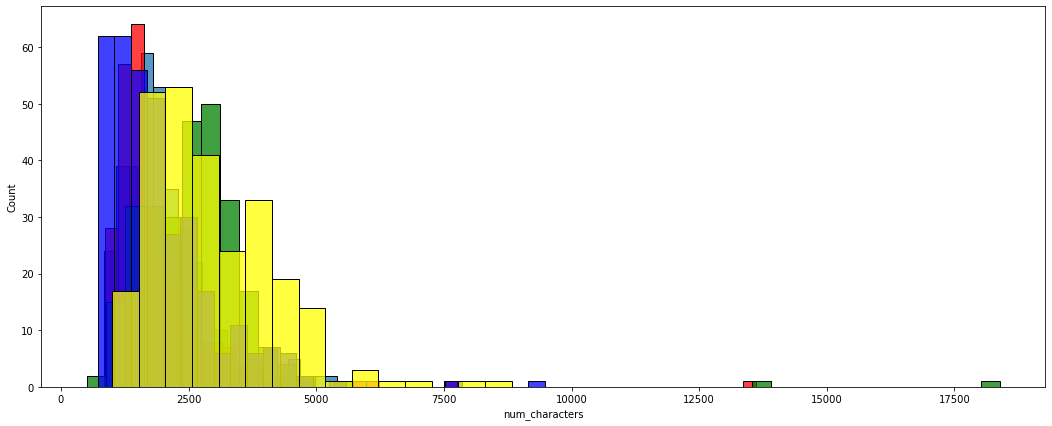

In [33]:
# Checking and printing histogram how much number of charactes are there in  'business', 'sport', 'tech', 'entertainment', 'politics' data
plt.figure(figsize = (18, 7))
sns.histplot(df_train[df_train['category'] == 0]['num_characters'])
sns.histplot(df_train[df_train['category'] == 1]['num_characters'], color = 'red')
sns.histplot(df_train[df_train['category'] == 2]['num_characters'], color = 'green')
sns.histplot(df_train[df_train['category'] == 3]['num_characters'], color = 'blue')
sns.histplot(df_train[df_train['category'] == 4]['num_characters'], color = 'yellow')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

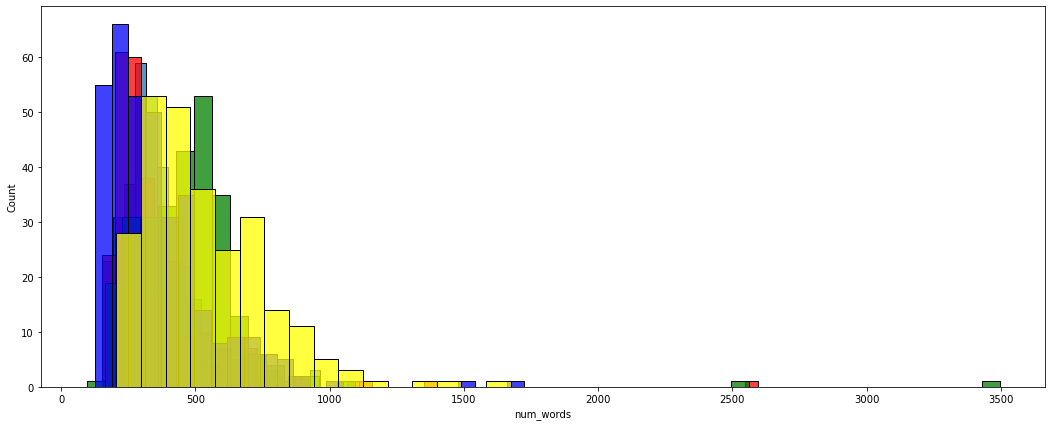

In [34]:
# Checking and printing histogram how much number of charactes are there in  'business', 'sport', 'tech', 'entertainment', 'politics' data
plt.figure(figsize = (18, 7))
sns.histplot(df_train[df_train['category'] == 0]['num_words'])
sns.histplot(df_train[df_train['category'] == 1]['num_words'], color = 'red')
sns.histplot(df_train[df_train['category'] == 2]['num_words'], color = 'green')
sns.histplot(df_train[df_train['category'] == 3]['num_words'], color = 'blue')
sns.histplot(df_train[df_train['category'] == 4]['num_words'], color = 'yellow')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

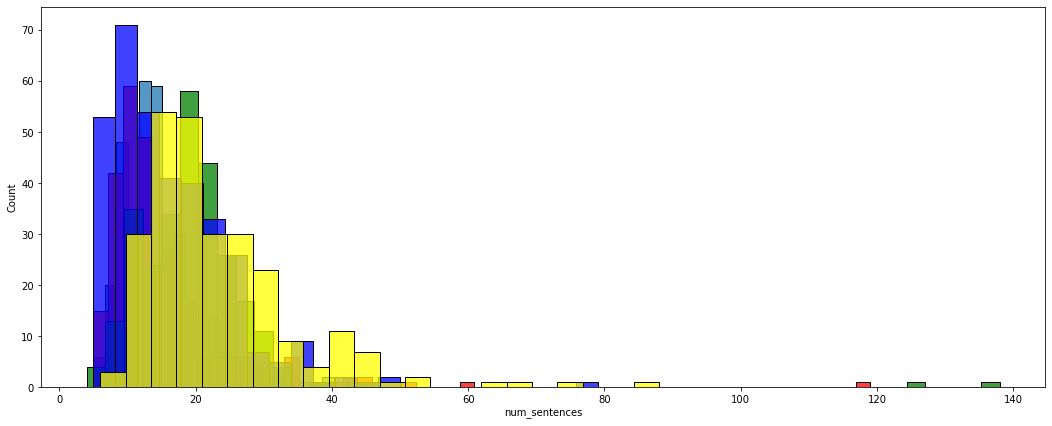

In [35]:
# Checking and printing histogram how much number of charactes are there in  'business', 'sport', 'tech', 'entertainment', 'politics' data
plt.figure(figsize = (18, 7))
sns.histplot(df_train[df_train['category'] == 0]['num_sentences'])
sns.histplot(df_train[df_train['category'] == 1]['num_sentences'], color = 'red')
sns.histplot(df_train[df_train['category'] == 2]['num_sentences'], color = 'green')
sns.histplot(df_train[df_train['category'] == 3]['num_sentences'], color = 'blue')
sns.histplot(df_train[df_train['category'] == 4]['num_sentences'], color = 'yellow')

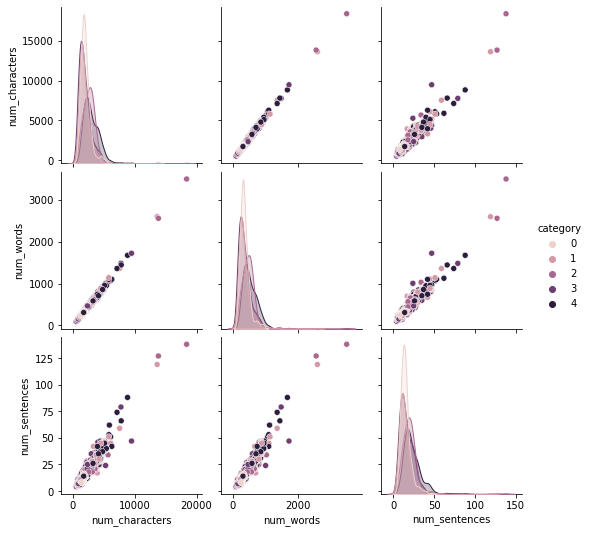

In [36]:
# Printing the pair plot graph b/w num_sentences, num_words and num_characters
sns.pairplot(df_train, hue = 'category')

<AxesSubplot:>

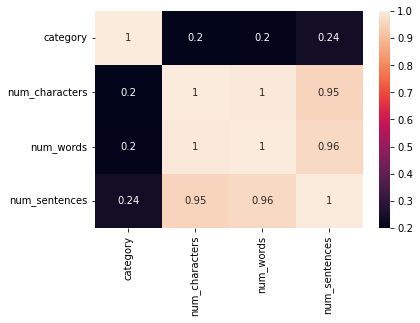

In [37]:
# Printing the heat map for checking the corelation
sns.heatmap(df_train.corr(), annot = True)

Data Preprocessing 

1.) Lower Case

2.) Tokenization

3.) Removing Special Character

4.) Removing stop words

5.) Stemming

In [38]:

#importing stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bhavya
[nltk_data]     Shah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# importing stop words
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
# importing punctuation strings
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
# transforming text on train data

def transform_text(text):
    #converting to lower case
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # removing the special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #applying stemming
    for i in text:
        y.append(ps.stem(i))
     
            
    return " ".join(y)

In [43]:
transform_text('Hello I m boy bai shah, i m 20 years old living in india')


'hello boy bai shah 20 year old live india'

In [44]:
df_train['text'][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [45]:
df_train['transform_text'] = df_train['text'].apply(transform_text)

In [46]:
df_train.head()

,text,category,num_characters,num_words,num_sentences,transform_text
0,worldcom ex-boss launches defence lawyers defe...,0,1866,316,12,worldcom launch defenc lawyer defend former wo...
1,german business confidence slides german busin...,0,2016,342,14,german busi confid slide german busi confid fe...
2,bbc poll indicates economic gloom citizens in ...,0,3104,544,21,bbc poll indic econom gloom citizen major nati...
3,lifestyle governs mobile choice faster bett...,4,3618,670,31,lifestyl govern mobil choic faster better funk...
4,enron bosses in $168m payout eighteen former e...,0,2190,382,16,enron boss 168m payout eighteen former enron d...


In [47]:
# importing word-cloud
from wordcloud import WordCloud

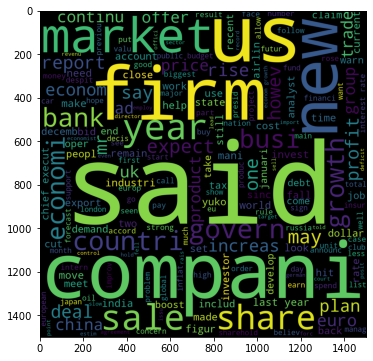

In [48]:
# Displaying the higest number of words used in the business using word cloud

wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'black')
business_wc = wc.generate(df_train[df_train['category'] == 0]['transform_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(business_wc)

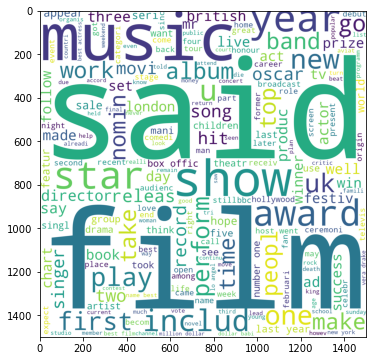

In [49]:
# Displaying the higest number of words used in the sport  using word cloud

wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'white')
sport_wc = wc.generate(df_train[df_train['category'] == 1]['transform_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(sport_wc)

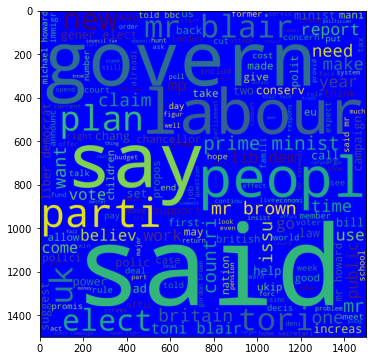

In [50]:
# Displaying the higest number of words used in the tech using word cloud

wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'blue')
tech_wc = wc.generate(df_train[df_train['category'] == 2]['transform_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(tech_wc)

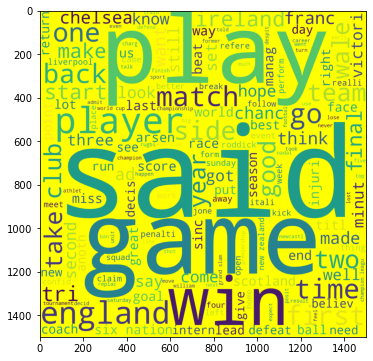

In [51]:
# Displaying the higest number of words used in the  entertainment using word cloud

wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'yellow')
entertainment_wc = wc.generate(df_train[df_train['category'] == 3]['transform_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(entertainment_wc)

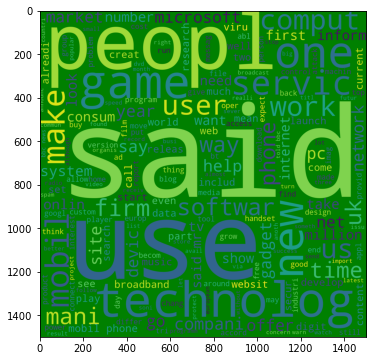

In [52]:
# Displaying the higest number of words used in the politics using word cloud

wc = WordCloud(width = 1500, height = 1500, min_font_size = 20, background_color = 'green')
politics_wc = wc.generate(df_train[df_train['category'] == 4]['transform_text'].str.cat(sep = ' '))
plt.figure(figsize = (12, 6))
plt.imshow(politics_wc)

In [53]:
# top 30 words used in the text(msg) of business

business_corpus = []
for msg in df_train[df_train['category'] == 0]['transform_text'].tolist():
  # etracting the all the words from the msg using split function
  for word in msg.split():
    business_corpus.append(word)

In [54]:
 # Checking the data present in business_corpus and printing the top 30 data
 len(business_corpus)

64748

In [55]:
# now we will create the dictionary of the business_corpus using the counter library

from collections import Counter
Counter(business_corpus).most_common(30)

[('said', 1100),
 ('year', 574),
 ('us', 512),
 ('mr', 394),
 ('compani', 392),
 ('firm', 374),
 ('market', 352),
 ('would', 308),
 ('bank', 281),
 ('also', 279),
 ('sale', 276),
 ('new', 273),
 ('growth', 257),
 ('economi', 251),
 ('share', 251),
 ('last', 237),
 ('govern', 237),
 ('countri', 229),
 ('price', 228),
 ('rate', 220),
 ('econom', 216),
 ('expect', 211),
 ('month', 204),
 ('busi', 198),
 ('could', 198),
 ('profit', 185),
 ('may', 182),
 ('say', 179),
 ('oil', 179),
 ('analyst', 178)]

In [56]:
# top 30 msg(words) used in the sports

sport_corpus = []
for msg in df_train[df_train['category'] == 1]['transform_text'].tolist():
    # etracting the all the words from the msg using split function
  for word in msg.split():
    sport_corpus.append(word)

In [57]:
 # Checking the data present in sport_corpus and printing the top 30 data
len(sport_corpus)


51683

In [58]:
# now we will create the dictionary of the sport_corpus using the counter library

from collections import Counter
Counter(sport_corpus).most_common(30)

[('film', 706),
 ('said', 594),
 ('best', 404),
 ('year', 392),
 ('award', 341),
 ('music', 336),
 ('star', 319),
 ('show', 283),
 ('also', 277),
 ('one', 267),
 ('us', 261),
 ('new', 234),
 ('includ', 231),
 ('actor', 204),
 ('first', 184),
 ('band', 179),
 ('top', 175),
 ('play', 173),
 ('number', 171),
 ('uk', 169),
 ('director', 165),
 ('last', 164),
 ('nomin', 159),
 ('mr', 152),
 ('record', 147),
 ('time', 145),
 ('two', 144),
 ('perform', 142),
 ('oscar', 142),
 ('take', 141)]

In [59]:
# top 30 msg(words) used in the tech

tech_corpus = []
for msg in df_train[df_train['category'] == 2]['transform_text'].tolist():
    # etracting the all the words from the msg using split function
  for word in msg.split():
    tech_corpus.append(word)

In [60]:
 # Checking the data present in tech_corpus and printing the top 30 data
len(tech_corpus)

67479

In [61]:
# now we will create the dictionary of the tech_corpus using the counter library

from collections import Counter
Counter(tech_corpus).most_common(30)

[('said', 1445),
 ('mr', 1099),
 ('would', 710),
 ('labour', 488),
 ('govern', 479),
 ('elect', 477),
 ('parti', 450),
 ('say', 443),
 ('blair', 391),
 ('peopl', 372),
 ('minist', 371),
 ('plan', 335),
 ('tori', 325),
 ('also', 308),
 ('new', 280),
 ('could', 272),
 ('brown', 264),
 ('tax', 251),
 ('year', 250),
 ('uk', 248),
 ('lord', 224),
 ('told', 219),
 ('public', 218),
 ('howard', 197),
 ('prime', 194),
 ('gener', 189),
 ('countri', 188),
 ('leader', 187),
 ('campaign', 187),
 ('want', 182)]

In [62]:
# top 30 msg(words) used in the entertainment

entertainment_corpus = []
for msg in df_train[df_train['category'] == 3]['transform_text'].tolist():
    # etracting the all the words from the msg using split function
  for word in msg.split():
    entertainment_corpus.append(word)

In [63]:
 # Checking the data present in entertainment_corpus and printing the top 30 data
len(entertainment_corpus)

61829

In [64]:
# now we will create the dictionary of the entertainment_corpus using the counter library

from collections import Counter
Counter(entertainment_corpus).most_common(30)

[('said', 635),
 ('game', 482),
 ('win', 419),
 ('play', 416),
 ('england', 327),
 ('first', 323),
 ('player', 308),
 ('year', 296),
 ('time', 270),
 ('world', 266),
 ('last', 258),
 ('two', 253),
 ('back', 243),
 ('one', 241),
 ('would', 233),
 ('match', 228),
 ('go', 223),
 ('side', 218),
 ('also', 214),
 ('cup', 206),
 ('second', 203),
 ('open', 203),
 ('team', 203),
 ('new', 198),
 ('take', 197),
 ('champion', 196),
 ('ireland', 194),
 ('final', 190),
 ('get', 184),
 ('wale', 183)]

In [65]:
# top 30 msg(words) used in the politics

politics_corpus = []
for msg in df_train[df_train['category'] == 4]['transform_text'].tolist():
    # etracting the all the words from the msg using split function
  for word in msg.split():
    politics_corpus.append(word)

In [66]:
 # Checking the data present in politics_corpus and printing the top 30 data
len(politics_corpus)

72368

In [67]:
# now we will create the dictionary of the politics_corpus using the counter library

from collections import Counter
Counter(politics_corpus).most_common(30)

[('said', 1064),
 ('use', 662),
 ('peopl', 646),
 ('game', 470),
 ('mobil', 421),
 ('phone', 395),
 ('technolog', 389),
 ('servic', 369),
 ('mr', 350),
 ('new', 349),
 ('also', 348),
 ('year', 341),
 ('one', 338),
 ('would', 322),
 ('could', 308),
 ('user', 300),
 ('make', 296),
 ('like', 284),
 ('comput', 279),
 ('net', 269),
 ('firm', 265),
 ('softwar', 265),
 ('music', 257),
 ('get', 256),
 ('digit', 249),
 ('work', 240),
 ('us', 238),
 ('mani', 236),
 ('time', 223),
 ('way', 219)]

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


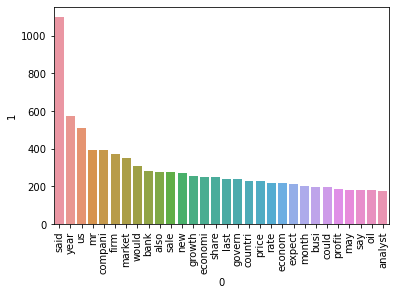

In [68]:
# converting the business_corpus into data frame and ploting the stick bar plot

sns.barplot(pd.DataFrame(Counter(business_corpus).most_common(30)) [0], pd.DataFrame(Counter(business_corpus).most_common(30)) [1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


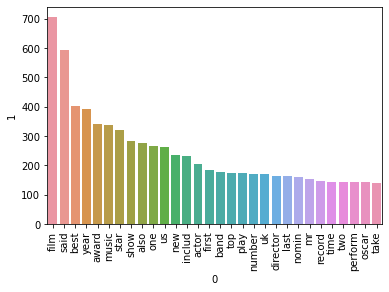

In [69]:
# converting the sport_corpus into data frame and ploting the stick bar plot

sns.barplot(pd.DataFrame(Counter(sport_corpus).most_common(30)) [0], pd.DataFrame(Counter(sport_corpus).most_common(30)) [1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


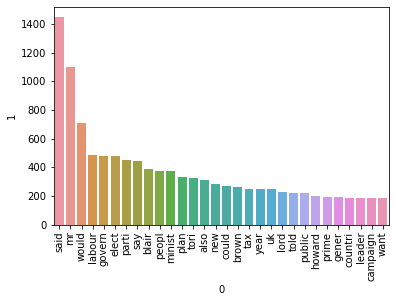

In [70]:
# converting the tech_corpus into data frame and ploting the stick bar plot

sns.barplot(pd.DataFrame(Counter(tech_corpus).most_common(30)) [0], pd.DataFrame(Counter(tech_corpus).most_common(30)) [1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


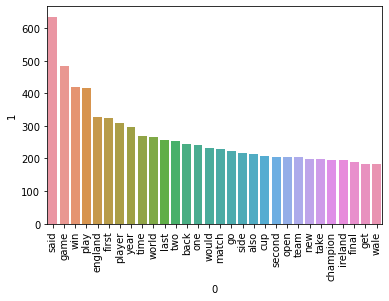

In [71]:
# converting the entertainment_corpus into data frame and ploting the stick bar plot

sns.barplot(pd.DataFrame(Counter(entertainment_corpus).most_common(30)) [0], pd.DataFrame(Counter(entertainment_corpus).most_common(30)) [1])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Bhavya Shah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


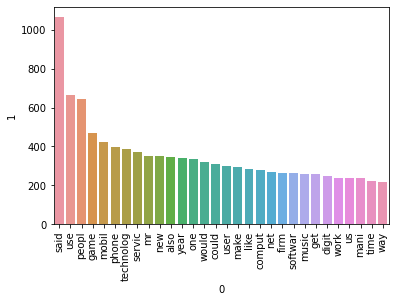

In [72]:
# converting the politics_corpus into data frame and ploting the stick bar plot

sns.barplot(pd.DataFrame(Counter(politics_corpus).most_common(30)) [0], pd.DataFrame(Counter(politics_corpus).most_common(30)) [1])
plt.xticks(rotation = 'vertical')
plt.show()

In [73]:
df_test = pd.read_csv('BBC News Test.csv')

In [74]:
df_test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [75]:
# printing the shape of data
df_test.shape

(735, 2)

In [76]:
# printing the info of the data set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


In [77]:
# Droping the artical id column which is of no use

df_test.drop(['ArticleId'], axis = 1, inplace = True)

In [78]:
df_test.head()

,Text
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...


In [79]:
# lowering the text of columns names

df_test.rename(columns = {'Text' : 'texts'}, inplace = True)

In [80]:
df_test.head()

,texts
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...


In [81]:
df_test.rename(columns = {'text' : 'texts'}, inplace = True)
df_test.head()

,texts
0,qpr keeper day heads for preston queens park r...
1,software watching while you work software that...
2,d arcy injury adds to ireland woe gordon d arc...
3,india s reliance family feud heats up the ongo...
4,boro suffer morrison injury blow middlesbrough...


In [82]:
# transforming texts on test data

def transform_texts(texts):
    #converting to lower case
    texts = texts.lower()
    texts = nltk.word_tokenize(texts)
    
    # removing the special character
    y = []
    for i in texts:
        if i.isalnum():
            y.append(i)
    
    texts = y[:]
    y.clear()
    
    # removing stop words
    for i in texts:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    texts = y[:]
    y.clear()
    
    #applying stemming
    for i in texts:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [83]:
transform_texts('Hello I m boy bai shah, i m 20 years old living in india')

'hello boy bai shah 20 year old live india'

In [84]:
df_test['texts'][1]

'software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 8

In [85]:
df_test['transform_text'] = df_test['texts'].apply(transform_texts)

In [86]:
df_test.rename(columns = {'texts' : 'text'}, inplace = True)
df_test.head()

,text,transform_text
0,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...
1,software watching while you work software that...,softwar watch work softwar monitor everi keyst...
2,d arcy injury adds to ireland woe gordon d arc...,arci injuri add ireland woe gordon arci rule i...
3,india s reliance family feud heats up the ongo...,india relianc famili feud heat ongo public spa...
4,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injuri blow middlesbrough...


In [87]:
#checking the character length of the test data
df_test['num_characters'] = df_test['text'].apply(len)

In [88]:
#checking the number of words of test data
df_test['num_words'] = df_test['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [89]:
#checking the number of sentences of test data
df_test['num_sentences'] = df_test['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [90]:
df_test.head()

,text,transform_text,num_characters,num_words,num_sentences
0,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...,849,167,10
1,software watching while you work software that...,softwar watch work softwar monitor everi keyst...,2636,456,18
2,d arcy injury adds to ireland woe gordon d arc...,arci injuri add ireland woe gordon arci rule i...,1309,250,13
3,india s reliance family feud heats up the ongo...,india relianc famili feud heat ongo public spa...,1818,331,14
4,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injuri blow middlesbrough...,775,142,6


In [91]:
df_train.head()

,text,category,num_characters,num_words,num_sentences,transform_text
0,worldcom ex-boss launches defence lawyers defe...,0,1866,316,12,worldcom launch defenc lawyer defend former wo...
1,german business confidence slides german busin...,0,2016,342,14,german busi confid slide german busi confid fe...
2,bbc poll indicates economic gloom citizens in ...,0,3104,544,21,bbc poll indic econom gloom citizen major nati...
3,lifestyle governs mobile choice faster bett...,4,3618,670,31,lifestyl govern mobil choic faster better funk...
4,enron bosses in $168m payout eighteen former e...,0,2190,382,16,enron boss 168m payout eighteen former enron d...


In [92]:
# printing the description of the data
df_test[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,735.000000,735.000000,735.000000
mean,2322.687075,424.009524,18.368707
std,1639.029711,310.946040,14.661999
min,727.000000,133.000000,6.000000
25%,1431.500000,263.000000,11.000000
50%,1979.000000,357.000000,15.000000
75%,2865.500000,518.000000,22.000000
max,25483.000000,4757.000000,227.000000


In [93]:
# Extracting the features from text using count vectorizer, tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [94]:
# careating the x and y
X = tfidf.fit_transform(df_train['transform_text']).toarray()

In [95]:
X.shape

(1490, 3000)

In [96]:
y = df_train['category'].values

In [114]:
y

array([0, 0, 0, ..., 0, 4, 4])

In [97]:
y.shape

(1490,)

In [98]:
#spliting the data into test and train
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [100]:
# importing the model libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [101]:
# creating the object Gaussian Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [102]:
# model training code of Gaussian Naive Bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score", precision_score(y_test,y_pred1, pos_label='positive', average='micro'))

0.8959731543624161
[[51  2  3  0  5]
 [ 0 56  4  0  4]
 [ 5  1 50  0  1]
 [ 1  0  1 60  0]
 [ 1  2  1  0 50]]
precision_score 0.8959731543624161


C:\Users\Bhavya Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [103]:
# model training code of Multinomial Naive Bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("precision_score :", precision_score(y_test,y_pred2, pos_label='positive', average='micro'))

0.9630872483221476
[[60  0  0  0  1]
 [ 0 64  0  0  0]
 [ 2  0 53  0  2]
 [ 1  0  0 61  0]
 [ 1  1  0  3 49]]
precision_score : 0.9630872483221476


C:\Users\Bhavya Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [104]:
# model training code of Bernoulli Naive Bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("precision_score", precision_score(y_test,y_pred3, pos_label='positive', average='micro'))

0.9530201342281879
[[58  1  1  0  1]
 [ 1 63  0  0  0]
 [ 2  0 54  0  1]
 [ 1  0  0 61  0]
 [ 3  3  0  0 48]]
precision_score 0.9530201342281879


C:\Users\Bhavya Shah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [113]:
# Creating the Pickle file of the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))